## Importing Libraries

First, we import the necessary libraries for data manipulation, downloading financial data, and plotting.

In [2]:
import pandas as pd
from utils import plot_rolling_mean

Here is a breakdown of the libraries being used:
- **pandas**: For data manipulation and analysis.
- **plot_rolling_mean**: A custom function (from the `utils` module) that is used for plotting cumulative and rolling mean returns.

## Loading S&P500 Futures Data

We load the S&P500 futures data from a CSV file.

In [3]:
prices = pd.read_csv("../data/sp500.csv", index_col=0, parse_dates=True)

We use `pd.read_csv()` to load the S&P500 futures data from `sp500.csv`. The `index_col=0` parameter sets the first column as the index, and `parse_dates=True` ensures that the index is interpreted as dates, which is essential for time series data.

## Computing Daily Returns

Next, we calculate the daily percentage changes in the S&P500 futures prices to get the daily returns.

In [4]:
returns = prices['Adj Close'].pct_change().dropna()

## Calculating Cumulative Returns

We calculate the cumulative returns over the period using the daily returns.

In [5]:
cumulative_returns = returns.add(1).cumprod() - 1

In [6]:
cumulative_returns.head()

Date
2000-09-19    0.007496
2000-09-20    0.001363
2000-09-21    0.001363
2000-09-22    0.000681
2000-09-25   -0.004429
Name: Adj Close, dtype: float64

By adding 1 to the daily returns and taking the cumulative product, we compute the cumulative returns. This gives us the total return over time, assuming the returns are compounded daily.

## Calculating Rolling Annualized Mean Returns

We calculate the rolling mean returns over different time periods (1 year, 3 years, and 10 years). The rolling mean return provides a smoothed return by averaging over a rolling window of a specified size.

In [13]:
trading_days_in_year = 252
rolling_mean_1yr = returns.rolling(window=trading_days_in_year).mean()*trading_days_in_year
rolling_mean_3yrs = returns.rolling(window=3*trading_days_in_year).mean()*trading_days_in_year
rolling_mean_10yrs = returns.rolling(window=10*trading_days_in_year).mean()*trading_days_in_year

Here is how we calculate the rolling mean returns:
- **1-year rolling mean**: We use a window size of 252 trading days (which is approximately one year of trading) and annualize the result by multiplying by 252.
- **3-year rolling mean**: We use a window size of 756 trading days (3 years of trading).
- **10-year rolling mean**: We use a window size of 2520 trading days (10 years of trading).

The rolling means are annualized by multiplying by 252 (the number of trading days in a year).

## Plotting the Results

Finally, we use a custom plotting function `plot_rolling_mean()` to plot the cumulative returns along with the rolling mean returns for the different time windows.

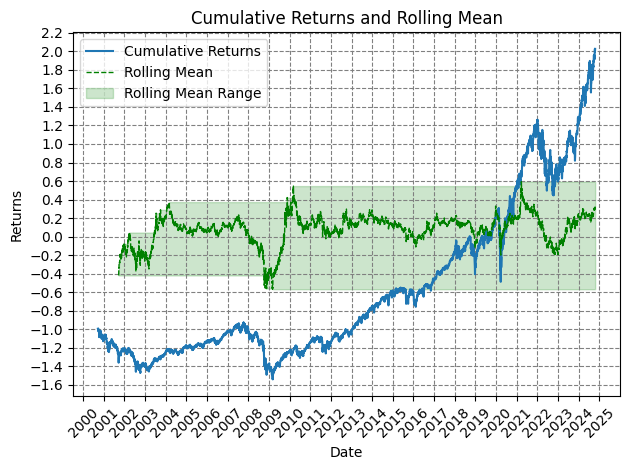

In [16]:
plot_rolling_mean(cumulative_returns, rolling_mean_1yr)

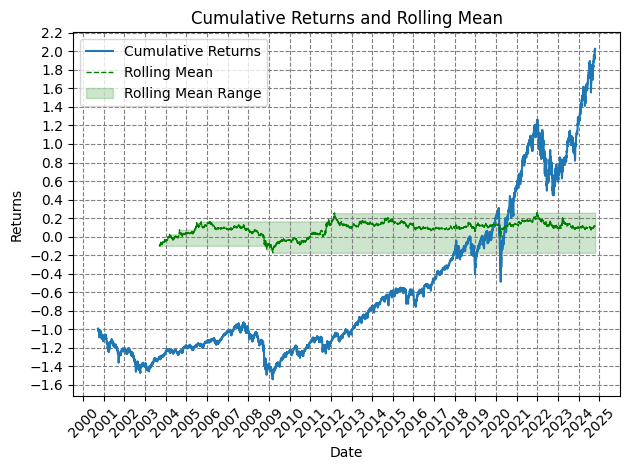

In [17]:
plot_rolling_mean(cumulative_returns, rolling_mean_3yrs)

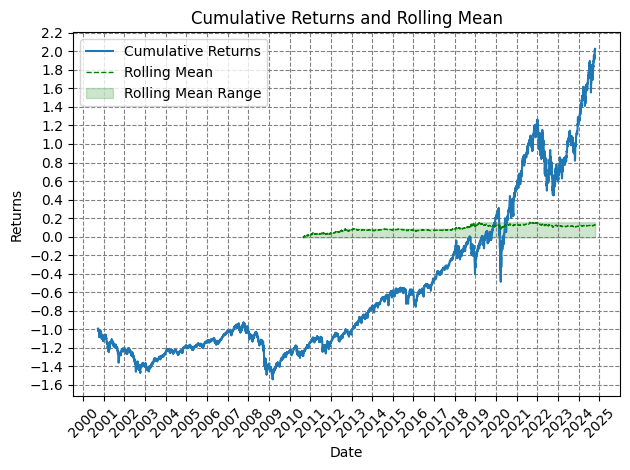

In [18]:
plot_rolling_mean(cumulative_returns, rolling_mean_10yrs)

The `plot_rolling_mean()` function is used to plot the cumulative returns and overlay the rolling mean returns for 1-year, 3-year, and 10-year periods. This allows us to visually compare the smoothed returns over different time horizons.